# Index

- [K-Mean Algorithm](#k-means-algorithm)
    - [The K-Mean Algorithm](#the-k-mean-algorithm)
- [Expectation-Maximization Algorithm](#expectation-maximization-algorithm)

---

## K-Means Algorithm

Unsupervised learning algorithms, also called **clustering algorithms**, learn from the properties of the data to find an optimal division of the samples into groups, assigning each sample to a discrete cluster label.

Many clustering algorithms are available in the Scikit-Learn library, but the simplest one is known as K-Means, which is implemented as sklearn.cluster.KMeans.

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set_theme()
import numpy as np
import warnings

The algorithm searches for the optimal number of clusters in a unlabeled multidimensional dataset.
- The center of a cluster is the arithmetic mean of all the points belonging to that cluster.
- Each point is closer to its own cluster center than to the centers of other clusters.

### **The K-Mean Algorithm**

1. Randomly select k centroids $C = \{C_1, C_2, ..., C_k\}$ from the data points $X = \{x_1, x_2, ..., x_n\} \in \mathbb{R}^D$ 
2. For each $x_i$ calculate the squared distance of that point for each centroids
3. The point is assigned to the cluster which has the smallest squared distance
4. Update the centroid positions based on the newly assigned points and repeat steps 2 and 3 until the change between the old and new centroids is below some threshold.

In [2]:
from IPython.display import display
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline

Let's create a bidimensional Dataset that has 3 clusters. All the points are going to have the same color (Unlabeled) 

In [ ]:
x, y = make_blobs(n_samples=2000, n_features=2, centers=3, random_state=170)
print(x)
print(y)

[[ -3.2098572    0.17028461]
 [-10.75792688  -6.03580724]
 [  1.82599087  -0.03013326]
 ...
 [  2.4903263    0.93888766]
 [  3.72973118   0.55967836]
 [ -4.51766507   0.73505799]]
[1 0 2 ... 2 2 1]


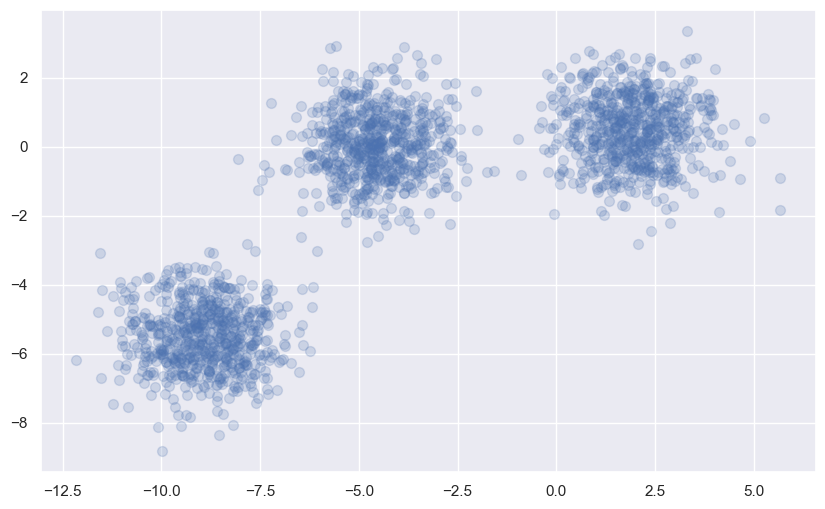

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:,0], x[:,1], s=50, alpha=0.2)
plt.show()

In [8]:
kmean = KMeans(n_clusters=3, n_init=3, init='k-means++', tol=1e-4, random_state=170, verbose=True)
kmean.fit(x)

Initialization complete
Iteration 0, inertia 6881.09907521286.
Iteration 1, inertia 3863.4811629091455.
Converged at iteration 1: center shift 0.0004958290344457466 within tolerance 0.001460220601920181.
Initialization complete
Iteration 0, inertia 6828.954670351951.
Iteration 1, inertia 3863.669599097694.
Converged at iteration 1: center shift 0.0007788466251475721 within tolerance 0.001460220601920181.
Initialization complete
Iteration 0, inertia 5307.66822379849.
Iteration 1, inertia 3863.185267723683.
Converged at iteration 1: center shift 5.199991875389339e-05 within tolerance 0.001460220601920181.


,n_clusters,3
,init,'k-means++'
,n_init,3
,max_iter,300
,tol,0.0001
,verbose,True
,random_state,170
,copy_x,True
,algorithm,'lloyd'


In [ ]:
# Predictions and Cluster's centroids

print(kmean.labels_)
print(kmean.cluster_centers_)

[2 1 0 ... 0 0 2]
[[ 1.91436542  0.47449673]
 [-8.93184647 -5.51241747]
 [-4.57551529  0.03080554]]


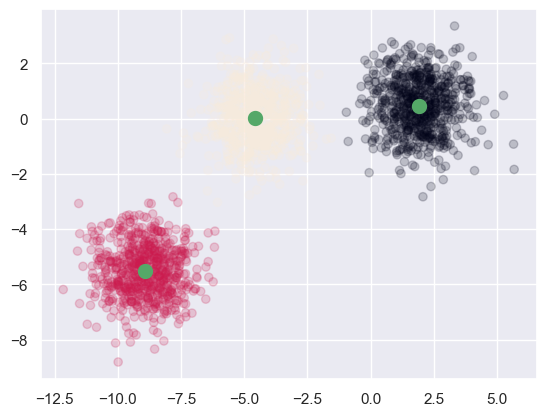

In [10]:
# Let's Graph

plt.Figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=kmean.labels_, alpha=0.2)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='g', marker='o', linewidths=5)
plt.show()

With the trained model we can predict new points

In [ ]:
x_new = np.array([[10,10], [-10, -10], [-5, 10]])
y_pred = kmean.predict(x_new)
print(y_pred) # Print the clusters where belongs

[0 1 2]


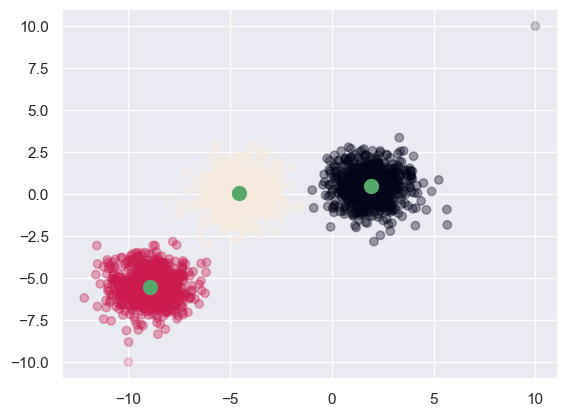

In [13]:
# Let's graph the new points
plt.scatter(x[:, 0], x[:, 1], c=kmean.labels_, alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_pred, alpha=0.2)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='g', marker='o', linewidths=5)
plt.show()

In [14]:
# Getting the distance to each centroid from a point

kmean.transform(x_new)

array([[12.49450675, 24.47549605, 17.6587226 ],
       [15.86402173,  4.61295446, 11.40360006],
       [11.77045716, 16.00295325,  9.97822757]])

## Expectation-Maximization Algorithm